In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Download and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1

# Define the number of classes in CIFAR-10
num_classes = 10

# Create data generators for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Define a function to build and compile the model
def build_model(base_model):
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Freeze the layers of the pre-trained model
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build models using VGG16 and VGG19
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg16_model = build_model(vgg16_base)

vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg19_model = build_model(vgg19_base)

# Train the models
batch_size = 32
epochs = 4

history_vgg16 = vgg16_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test))
history_vgg19 = vgg19_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test))




Epoch 1/4
1563/1563 [==============================] - 293s 187ms/step - loss: 1.5599 - accuracy: 0.1008 - val_loss: 1.3657 - val_accuracy: 0.0660
Epoch 2/4
1563/1563 [==============================] - 303s 194ms/step - loss: 1.4173 - accuracy: 0.0990 - val_loss: 1.3048 - val_accuracy: 0.0852
Epoch 3/4
1563/1563 [==============================] - 309s 197ms/step - loss: 1.3775 - accuracy: 0.0970 - val_loss: 1.2390 - val_accuracy: 0.1093
Epoch 4/4
1563/1563 [==============================] - 280s 179ms/step - loss: 1.3534 - accuracy: 0.0982 - val_loss: 1.2473 - val_accuracy: 0.0762
Epoch 1/4
1563/1563 [==============================] - 356s 227ms/step - loss: 1.6107 - accuracy: 0.0976 - val_loss: 1.4048 - val_accuracy: 0.1135
Epoch 2/4
1563/1563 [==============================] - 365s 234ms/step - loss: 1.4829 - accuracy: 0.0969 - val_loss: 1.3230 - val_accuracy: 0.1120
Epoch 3/4
1563/1563 [==============================] - 357s 228ms/step - loss: 1.4315 - accuracy: 0.0979 - val_loss: 1

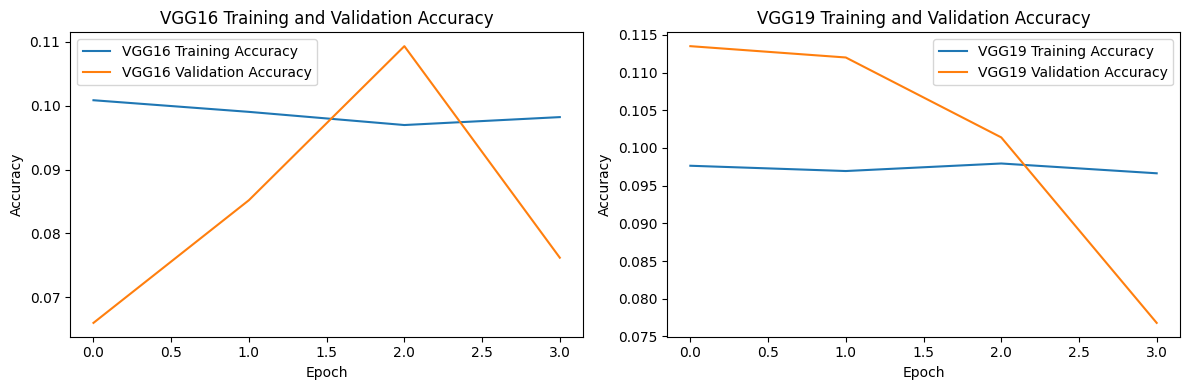

In [2]:
# Plotting the training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['accuracy'], label='VGG16 Training Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='VGG16 Validation Accuracy')
plt.title('VGG16 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_vgg19.history['accuracy'], label='VGG19 Training Accuracy')
plt.plot(history_vgg19.history['val_accuracy'], label='VGG19 Validation Accuracy')
plt.title('VGG19 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

17225924/17225924 [==============================] - 6s 0us/step
Epoch 1/4
1563/1563 [==============================] - 964s 612ms/step - loss: 3.3012 - accuracy: 0.0115 - val_loss: 2.7889 - val_accuracy: 0.0159
Epoch 2/4
1563/1563 [==============================] - 1449s 927ms/step - loss: 2.8952 - accuracy: 0.0099 - val_loss: 2.6918 - val_accuracy: 0.0110
Epoch 3/4
1563/1563 [==============================] - 1017s 650ms/step - loss: 2.8109 - accuracy: 0.0104 - val_loss: 2.6249 - val_accuracy: 0.0139
Epoch 4/4
1563/1563 [==============================] - 853s 546ms/step - loss: 2.7700 - accuracy: 0.0107 - val_loss: 2.6064 - val_accuracy: 0.0124
Epoch 1/4
1563/1563 [==============================] - 895s 551ms/step - loss: 2.9341 - accuracy: 0.0102 - val_loss: 2.3131 - val_accuracy: 0.0124
Epoch 2/4
1563/1563 [==============================] - 1168s 747ms/step - loss: 2.5191 - accuracy: 0.0101 - val_loss: 2.2230 - val_accuracy: 0.0121
Epoch 3/4
1563/1563 [=============================

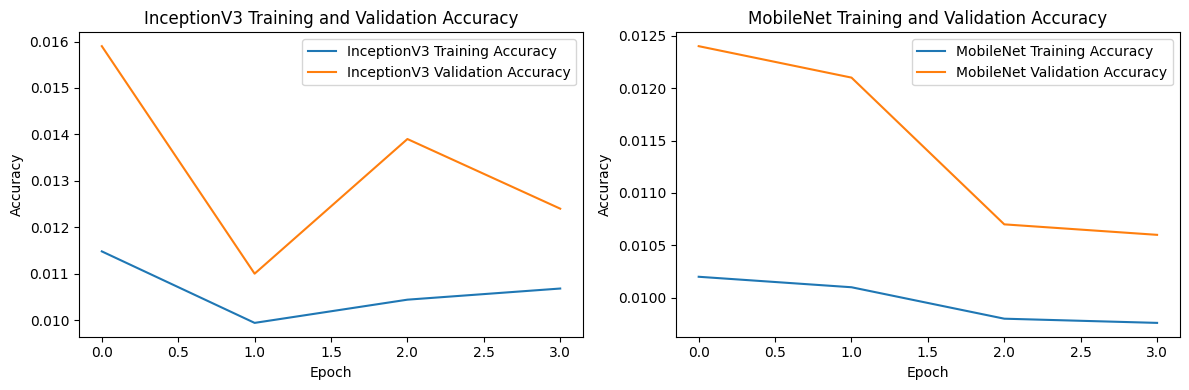

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt

# Download and preprocess the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1

# Resize images to meet the minimum input size requirements
x_train_resized = tf.image.resize(x_train, (75, 75))
x_test_resized = tf.image.resize(x_test, (75, 75))

# Define the number of classes in CIFAR-100
num_classes = 100

# Create data generators for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Define a function to build and compile the model
def build_model(base_model):
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Freeze the layers of the pre-trained model
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build models using InceptionV3 and MobileNet
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
inception_model = build_model(inception_base)

mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
mobilenet_model = build_model(mobilenet_base)

# Train the models
batch_size = 32
epochs = 4

history_inception = inception_model.fit(datagen.flow(x_train_resized, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test_resized, y_test))
history_mobilenet = mobilenet_model.fit(datagen.flow(x_train_resized, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test_resized, y_test))

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_inception.history['accuracy'], label='InceptionV3 Training Accuracy')
plt.plot(history_inception.history['val_accuracy'], label='InceptionV3 Validation Accuracy')
plt.title('InceptionV3 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['accuracy'], label='MobileNet Training Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='MobileNet Validation Accuracy')
plt.title('MobileNet Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
